In [78]:
import pandas as pd
Airport=pd.read_csv('Airport.csv')
Airport.head()

,FL_DATE,ORIGIN_CITY_NAME,DEST_CITY_NAME,DEST_STATE_NM,DEP_DELAY,ARR_DELAY
0,11/1/2022,"Albany, NY","Atlanta, GA",Georgia,-2.0,-17.0
1,11/1/2022,"Albany, NY","Atlanta, GA",Georgia,-1.0,-11.0
2,11/1/2022,"Albany, NY","Atlanta, GA",Georgia,12.0,-11.0
3,11/1/2022,"Albany, NY","Baltimore, MD",Maryland,-4.0,-13.0
4,11/1/2022,"Albany, NY","Baltimore, MD",Maryland,-4.0,-11.0


In [79]:
#Information about the data
Airport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32072 entries, 0 to 32071
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FL_DATE           32072 non-null  object 
 1   ORIGIN_CITY_NAME  32072 non-null  object 
 2   DEST_CITY_NAME    32072 non-null  object 
 3   DEST_STATE_NM     32072 non-null  object 
 4   DEP_DELAY         31412 non-null  float64
 5   ARR_DELAY         31335 non-null  float64
dtypes: float64(2), object(4)
memory usage: 1.5+ MB


In [80]:
#Converting the columns names to lower cases.
Airport.columns=Airport.columns.str.lower()

In [81]:
#CHECKING FOR MISSING VALUES.
Airport.isnull().sum()

fl_date               0
origin_city_name      0
dest_city_name        0
dest_state_nm         0
dep_delay           660
arr_delay           737
dtype: int64

In [82]:
#Replacing the missing values with respective medians.
Airport['dep_delay']=Airport['dep_delay'].fillna(Airport['dep_delay'].median())
Airport['arr_delay']=Airport['arr_delay'].fillna(Airport['arr_delay'].median())
Airport.isnull().sum()

fl_date             0
origin_city_name    0
dest_city_name      0
dest_state_nm       0
dep_delay           0
arr_delay           0
dtype: int64

In [83]:
#Removing Duplicates
Airport.drop_duplicates()

,fl_date,origin_city_name,dest_city_name,dest_state_nm,dep_delay,arr_delay
0,11/1/2022,"Albany, NY","Atlanta, GA",Georgia,-2.0,-17.0
1,11/1/2022,"Albany, NY","Atlanta, GA",Georgia,-1.0,-11.0
2,11/1/2022,"Albany, NY","Atlanta, GA",Georgia,12.0,-11.0
3,11/1/2022,"Albany, NY","Baltimore, MD",Maryland,-4.0,-13.0
4,11/1/2022,"Albany, NY","Baltimore, MD",Maryland,-4.0,-11.0
...,...,...,...,...,...,...
32067,11/30/2022,"Syracuse, NY","Chicago, IL",Illinois,-8.0,-16.0
32068,11/30/2022,"Syracuse, NY","Chicago, IL",Illinois,-5.0,-30.0
32069,11/30/2022,"Syracuse, NY","Chicago, IL",Illinois,-4.0,-22.0
32070,11/30/2022,"Syracuse, NY","Chicago, IL",Illinois,6.0,2.0


In [84]:
#Converting the date to datetime.
Airport['fl_date']=pd.to_datetime(Airport['fl_date'])


In [92]:
#summary of the numerical columns
numeric.describe()

,dep_delay,arr_delay
count,32072.000000,32072.000000
mean,11.369980,5.810738
std,51.590184,54.235072
min,-27.000000,-68.000000
25%,-6.000000,-18.000000
50%,-3.000000,-6.000000
75%,7.000000,10.000000
max,1588.000000,1579.000000


In [89]:
#Summary of the categorial columns.
Airport.describe(include=['object'])

,origin_city_name,dest_city_name
count,32072,32072
unique,13,96
top,"New York, NY","Chicago, IL"
freq,25478,2224


In [88]:
#Dropping the Destination state column
Airport.drop('dest_state_nm',axis=1,inplace=True)

In [90]:
Airport.head(9)

,fl_date,origin_city_name,dest_city_name,dep_delay,arr_delay
0,2022-11-01,"Albany, NY","Atlanta, GA",-2.0,-17.0
1,2022-11-01,"Albany, NY","Atlanta, GA",-1.0,-11.0
2,2022-11-01,"Albany, NY","Atlanta, GA",12.0,-11.0
3,2022-11-01,"Albany, NY","Baltimore, MD",-4.0,-13.0
4,2022-11-01,"Albany, NY","Baltimore, MD",-4.0,-11.0
5,2022-11-01,"Albany, NY","Baltimore, MD",-2.0,-14.0
6,2022-11-01,"Albany, NY","Baltimore, MD",0.0,-4.0
7,2022-11-01,"Albany, NY","Baltimore, MD",3.0,-12.0
8,2022-11-01,"Albany, NY","Charlotte, NC",-7.0,-14.0


In [ ]:
#Removing Outliers
def remove_outliers(df,column):
    Q1=Airport[['dep_delay','arr_delay']].quantile(0.25)
    Q3=Airport[['dep_delay','arr_delay']].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    outliers=(Airport[['dep_delay','arr_delay']]<lower_bound) | (Airport[['dep_delay','arr_delay']]>upper_bound)
    return Airport[~outliers]
Airport=remove_outliers(Airport,Airport['arr_delay'])
Airport=remove_outliers(Airport,Airport['dep_delay'])

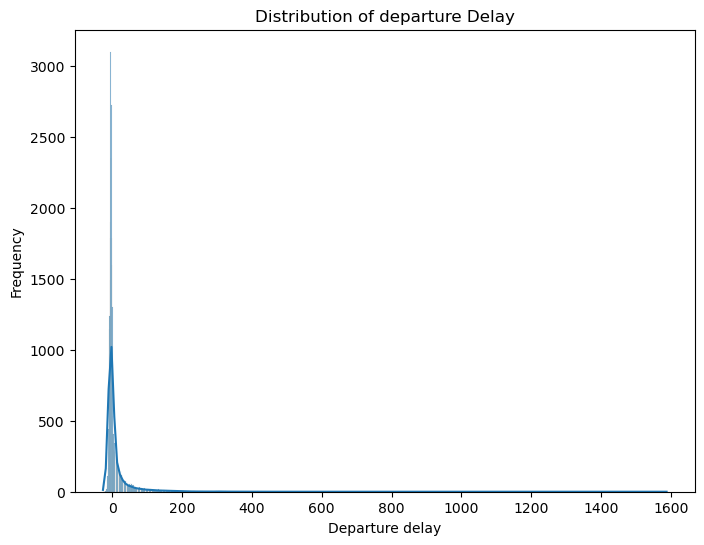

In [93]:
#Exploratory Data Analysis.
#Histogram of the departure delay.
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,6))
sns.histplot(numeric['dep_delay'],kde=True)
plt.title('Distribution of departure Delay')
plt.xlabel('Departure delay')
plt.ylabel('Frequency')
plt.show()

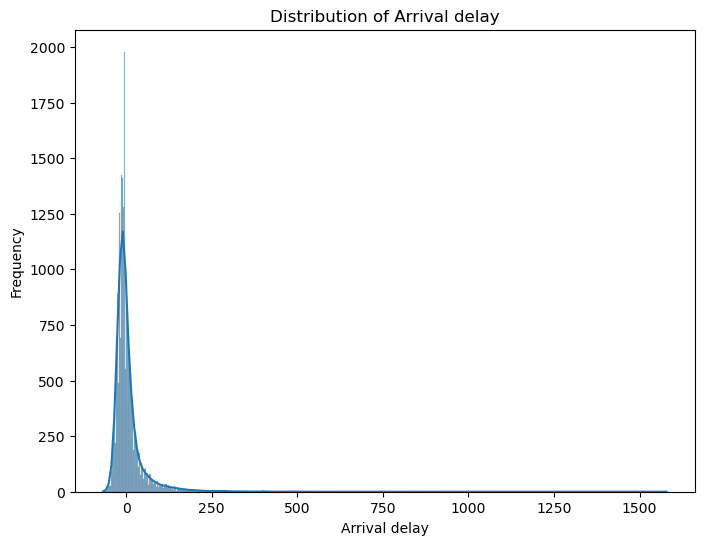

In [94]:
#Distribution of arrival delay 
plt.figure(figsize=(8,6))
sns.histplot(numeric['arr_delay'],kde=True)
plt.title('Distribution of Arrival delay')
plt.xlabel('Arrival delay')
plt.ylabel('Frequency')
plt.show()

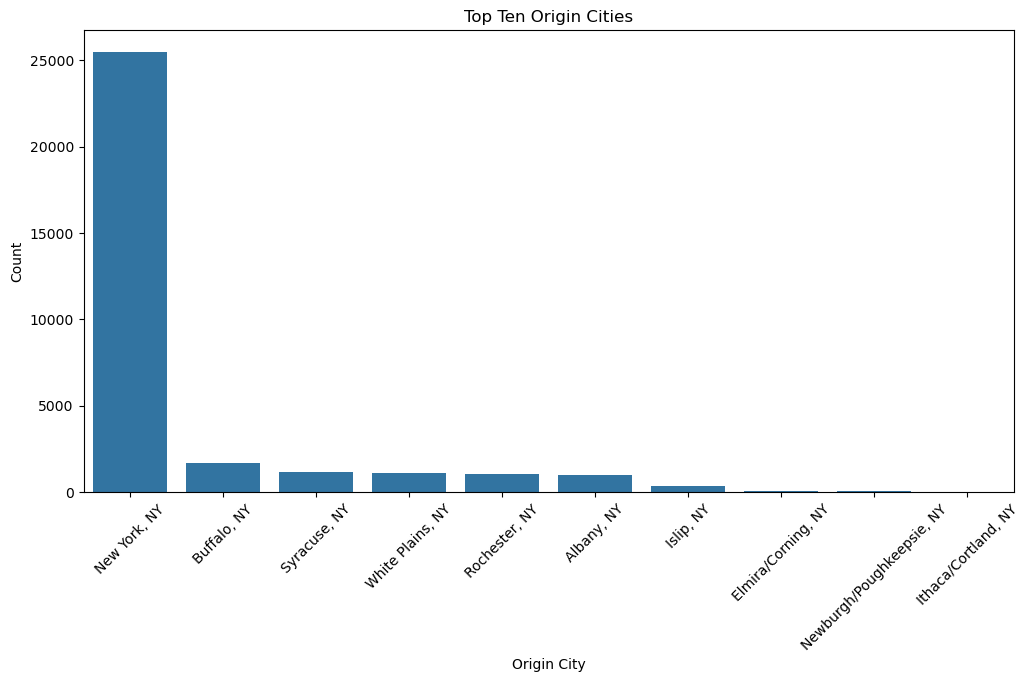

In [49]:
#Countplot of Origin cities
plt.figure(figsize=(12,6))
sns.countplot(x='origin_city_name',data=Airport,order=Airport['origin_city_name'].value_counts().head(10).index)
plt.title('Top Ten Origin Cities')
plt.xlabel('Origin City')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

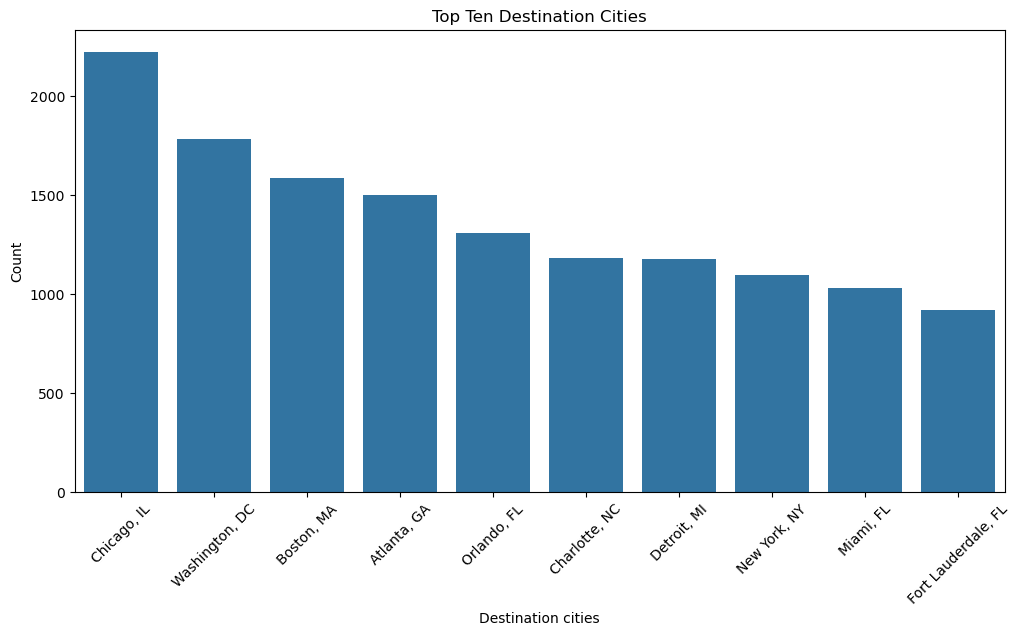

In [50]:
#countplot of the departure cities
plt.figure(figsize=(12,6))
sns.countplot(x='dest_city_name',data=Airport,order=Airport['dest_city_name'].value_counts().head(10).index)
plt.title('Top Ten Destination Cities')
plt.xlabel('Destination cities')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

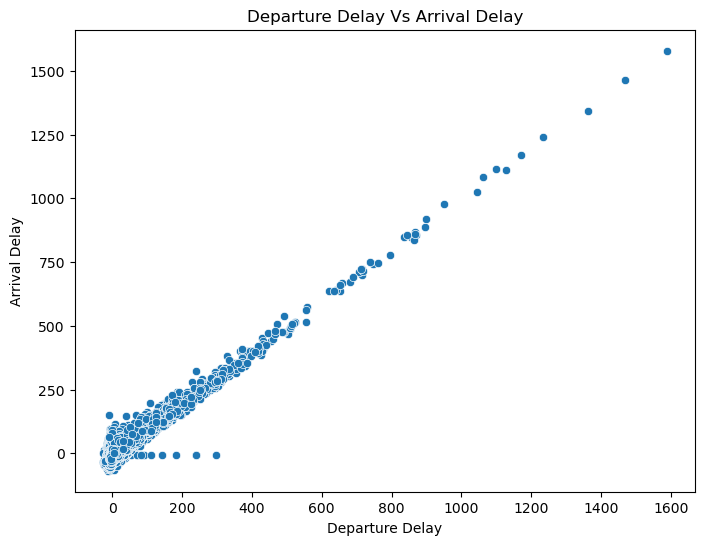

In [95]:
#Scatter plot  of Departure delay and Arrival delay.
plt.figure(figsize=(8,6))
sns.scatterplot(x='dep_delay',y='arr_delay',data=numeric)
plt.title('Departure Delay Vs Arrival Delay')
plt.xlabel('Departure Delay')
plt.ylabel('Arrival Delay')
plt.show()

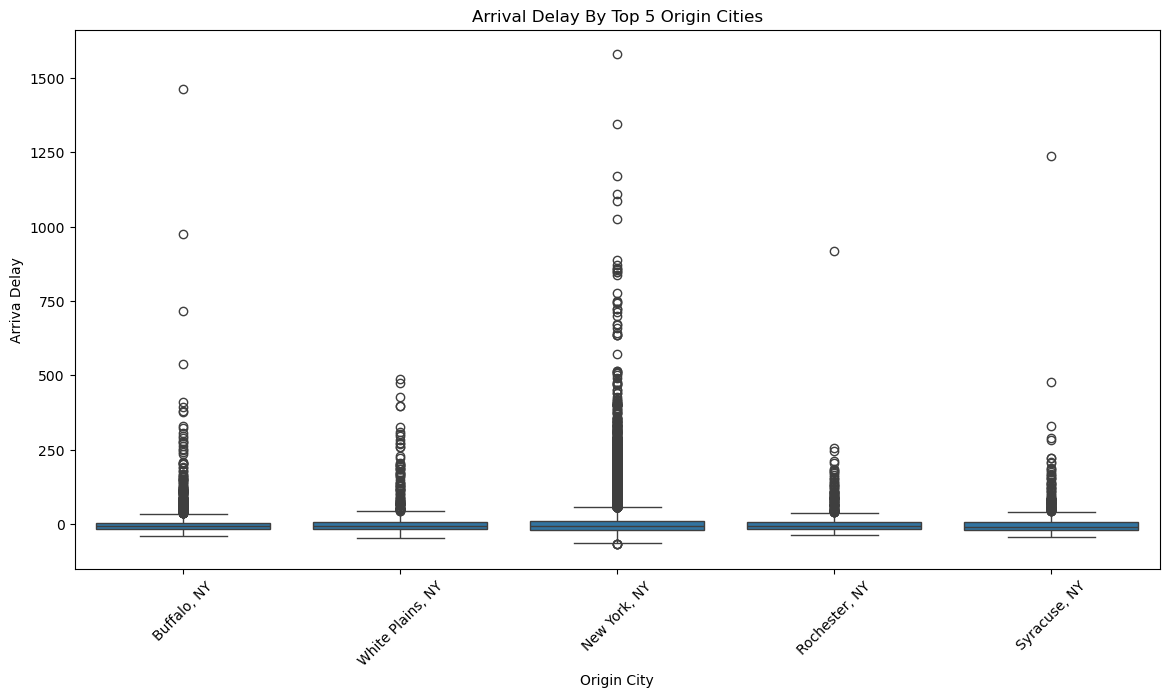

In [97]:
#Boxplot of Arrival Delay By Top origin City
plt.figure(figsize=(14,7))
sns.boxplot(x='origin_city_name',y=numeric['arr_delay'],data=Airport[Airport['origin_city_name'].isin(Airport['origin_city_name'].value_counts().nlargest(5).index)])
plt.title('Arrival Delay By Top 5 Origin Cities')
plt.xlabel('Origin City')
plt.ylabel('Arriva Delay')
plt.xticks(rotation=45)
plt.show()